# Statistical Machine Learning - Final exam exercise 1

### <span style="color:red"> WRITE YOUR NAME HERE: </span>   

In [1]:
print("Deepakraj DHANARAJ")

Deepakraj DHANARAJ


### Guidelines

The exam is composed of two exercises (on separate notebooks) each one with a specific dataset. In total, there are three independent parts to complete:
* Exercise 1 (8 points): regression
* Exercise 2 part 1 (9 points): classification
* Exercise 2 part 2 (3 points): clustering

You can work directly on the notebooks. At the end of the 2.5-hour exam, you will have 5 minutes to upload it on Teams.

Don't forget that you have to complete the TWO notebooks to have a passing grade.

Many questions can be tackled even if the previous ones are not completed or not correct.

The exam is long on purpose, so don't worry if you cannot complete 100 % of the questions. Do as much as you can. In case you are blocked at some point, don't panic. Just move on to the next question. And remember written answers where you have to explain or comment your results are worth many points.

Avoid "naive" copy-pasting: you will not understand what you are doing and it will be a problem for the next questions. Notebooks that are cluttered with useless code that has been mindlessly copied will be penalized. Just do what is asked at each question. 

Moreover, you are reminded that any messaging with each other during the exam or use of generative AI models such as ChatGPT, Bard or Bing will be considered as cheating and will result in the termination of your exam. Moreover, similarities between student works are easy to spot. 

If a question seems unclear and you are not sure about what you have to do, do not hesitate to raise your hand and ask for clarification.

Good luck!

## Exercise 1 (8 points)

Here are some libraries that could be usefull in the exercises.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

We will work here on the Boston housing data set that records the median value of houses for 506 neighborhoods around Boston. Our task is to predict the median house value.

Let's import that data set.  

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
features = pd.DataFrame(data, columns=colnames).drop('B', axis=1)
target = raw_df.values[1::2, 2]

Below is the description of the variables in the dataset. Come back to it when you need to.

### Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 dollars
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
    
    :Target:
        - HOUSEVALUE    Median value of owner-occupied homes in slices of 1000 dollars

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

Let's prepare the data frame of the target (corresponding to the median value (in thousands of dollars) of the houses in a specific neighborhood of Boston):

In [4]:
y = pd.Series(data=target, name='HOUSEVALUE')
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: HOUSEVALUE, dtype: float64

Let's prepare the data frame of the features:

In [5]:
X = features.copy()
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


### 1) We will focus here on LSTAT. 
- Compute the correlation of LSTAT with the other features. 
- Which other feature is the most correlated with LSTAT? 
- Which is the least?

In [6]:
correlation = features.corr()['LSTAT']
most_correlated_feature = correlation.drop('LSTAT').idxmax()
least_correlated_feature = correlation.drop('LSTAT').idxmin()

print("Computing LSTAT with other features:")
print(correlation)
print("Most correlated feature with LSTAT:", most_correlated_feature)
print("Least correlated feature with LSTAT:", least_correlated_feature)


Computing LSTAT with other features:
CRIM       0.455621
ZN        -0.412995
INDUS      0.603800
CHAS      -0.053929
NOX        0.590879
RM        -0.613808
AGE        0.602339
DIS       -0.496996
RAD        0.488676
TAX        0.543993
PTRATIO    0.374044
LSTAT      1.000000
Name: LSTAT, dtype: float64
Most correlated feature with LSTAT: INDUS
Least correlated feature with LSTAT: RM


### 2a) Plot HOUSEVALUE (our target) vs. LSTAT (our predictor)

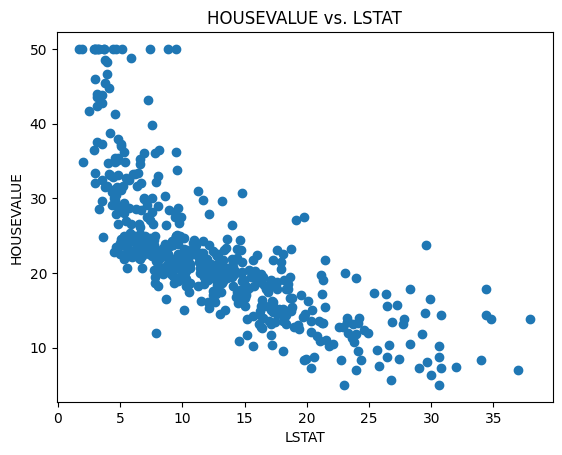

In [7]:
import matplotlib.pyplot as plt

plt.scatter(features['LSTAT'], target)
plt.xlabel('LSTAT')
plt.ylabel('HOUSEVALUE')
plt.title('HOUSEVALUE vs. LSTAT')
plt.show()


### 2b) Do you think that a linear regression is relevant for predicting HOUSEVALUE from LSTAT? Explain why.

In [8]:
from sklearn.linear_model import LinearRegression

df = pd.DataFrame({'LSTAT': features['LSTAT'], 'HOUSEVALUE': target})

correlation = df.corr().loc['LSTAT', 'HOUSEVALUE']
print("Correlation between LSTAT and HOUSEVALUE:", correlation)

X = df[['LSTAT']]
y = df['HOUSEVALUE']
model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Correlation between LSTAT and HOUSEVALUE: -0.7376627261740145
Coefficients: [-0.95004935]
Intercept: 34.5538408793831


### 3) Proceed to a split of the dataset. Keep 60% of the data for training. Bear in mind that you will have to give an accurate estimation of the performance of your best model at the end.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


### 4a) Train a linear regression model with only LSTAT as a feature. 

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train_lstat = X_train[['LSTAT']]
X_test_lstat = X_test[['LSTAT']]
model.fit(X_train_lstat, y_train)


y_pred = model.predict(X_test_lstat)
y_pred


array([26.41280092, 31.99812553, 17.25935603, 29.98092118, 18.07029246,
       23.44274626, 16.9958017 , 11.08610251, 22.53044279, 21.05048381,
       17.41140661, 18.24261645, -1.90915368, 23.06768817, 23.67589049,
       23.75698413, 17.75605459,  4.53779089, 32.56578103, 17.1985358 ,
       28.89629371, 28.2880914 , 12.66742853, 25.77418848, 19.66175519,
       17.1883991 , 26.35198068, 16.61060689, 18.07029246, 21.28362804,
       20.68556242, 28.27795469, 21.95265059, 25.24707981, 13.96492681,
       19.57052484, 31.49129027, 25.64241131, 20.71597254, 27.93330671,
       14.14738751, 27.94344342, 32.65701138, 22.30743527, 26.64594514,
       18.23247974, 16.97552829, 28.76451654, 19.06368958, 30.52830327,
       22.12497458, 30.92363477, 16.60047019, 27.80152954, 32.37318363,
       24.8517483 , 18.75958842, 32.20085964, 25.82487201, 16.86402453,
       25.94651247, 30.70062726, 31.76498131, 23.72657401, 30.0113313 ,
       12.17072998, 18.22234304, 28.76451654, 31.19732582, 16.30

### 4b) Compute the performance metrics of the model (at least one interpretable metric of your choice).   How do you interpret that? Does the model have a reasonable error in this context?

In [11]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE", rmse)


RMSE 6.2087305844885865


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(X_test, y_test)
RMSE = mean_squared_error(X_test, y_test, squared=False) 
MAE = mean_absolute_error(X_test, y_test)

 

print(MSE)
print(RMSE)
print(MAE)

291.5859098522168
17.075886795484937
13.448128078817735


### 4c) What is the reggression coefficient (parameter) associated to LSTAT? Can you interpret this coefficient and explain how the model generates predictions for HOUSEVALUE mathematically?

In [13]:
coefficient = model.coef_[0]

print("reg coefficient", coefficient)


reg coefficient -1.0136705295702848


In [14]:
HOUSEVALUE = intercept + coefficient * features['LSTAT']
HOUSEVALUE


0      29.505762
1      25.288892
2      30.468749
3      31.573650
4      29.150977
         ...    
501    24.751647
502    25.349712
503    28.836739
504    27.985256
505    26.566117
Name: LSTAT, Length: 506, dtype: float64

### 4d) Add the regression line on your plot HOUSEVALUE vs. LSTAT

In [15]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)


RMSE: 6.2087305844885865


### 5a) Use any feature engineering technique you know in order to train a better linear regression model that uses LSTAT to predict HOUSEVALUE  
Hint: Look at the regression line you plotted in the last question. It seems like a straight line is not the best to fit this point cloud. Is there a technique we saw in class that allows you to fit a different curve while still using only LSTAT as a feature?

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


X = df['LSTAT'].values.reshape(-1, 1)  
y = df['HOUSEVALUE'].values 

degree = 2  
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_pred_lstat = model.predict(X_range_poly)
y_pred_lstat



array([38.95655831, 38.16359488, 37.38230204, 36.6126798 , 35.85472816,
       35.10844712, 34.37383668, 33.65089683, 32.93962758, 32.24002893,
       31.55210088, 30.87584343, 30.21125658, 29.55834032, 28.91709467,
       28.28751961, 27.66961515, 27.06338128, 26.46881802, 25.88592536,
       25.31470329, 24.75515182, 24.20727095, 23.67106068, 23.146521  ,
       22.63365193, 22.13245345, 21.64292557, 21.16506829, 20.69888161,
       20.24436553, 19.80152004, 19.37034516, 18.95084087, 18.54300718,
       18.14684408, 17.76235159, 17.3895297 , 17.0283784 , 16.6788977 ,
       16.3410876 , 16.0149481 , 15.70047919, 15.39768089, 15.10655318,
       14.82709607, 14.55930956, 14.30319365, 14.05874834, 13.82597362,
       13.60486951, 13.39543599, 13.19767307, 13.01158075, 12.83715902,
       12.6744079 , 12.52332737, 12.38391744, 12.25617811, 12.14010938,
       12.03571125, 11.94298371, 11.86192677, 11.79254044, 11.7348247 ,
       11.68877955, 11.65440501, 11.63170106, 11.62066772, 11.62

### 5b) Show the regression line of your new model on the plot HOUSEVALUE vs. LSTAT

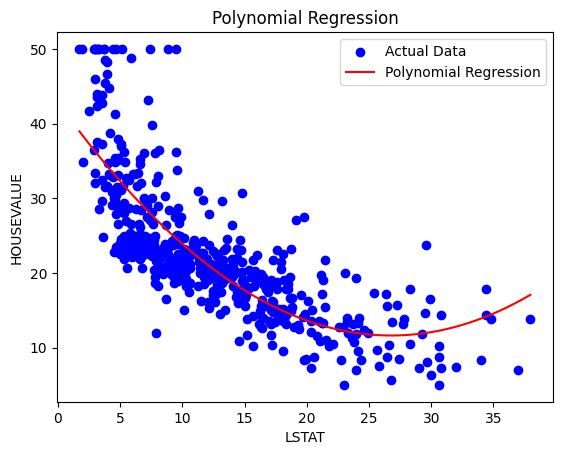

In [18]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_pred_lstat, color='red', label='Polynomial Regression')
plt.xlabel('LSTAT')
plt.ylabel('HOUSEVALUE')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

### 5c) What are the performance metrics of your model now, compared to those of question 4b? Is this model better than the previous one? Why?

### 6a) Train a third regression model that uses all the avalilable features as predictors

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [25]:
y_pred_rf = regressor.predict(X_test)
y_pred_rf

array([20.46      , 37.62      , 17.99833333, 24.81266667, 14.08      ,
       22.73      , 15.05      , 11.95      , 20.97      , 21.03      ,
       18.46      , 17.99      , 11.32      , 19.98333333, 23.98      ,
       23.98      , 21.49      ,  8.43      , 46.        , 15.05      ,
       31.09      , 25.82      , 10.04      , 19.13      , 11.01      ,
       15.05      , 20.06      , 17.62      , 14.08      , 21.215     ,
       20.61      , 25.82      , 19.9       , 21.65      , 13.72      ,
       18.7       , 37.8       , 24.07      , 18.96      , 25.55      ,
       13.03      , 25.55      , 46.        , 21.37      , 40.96      ,
       17.99      , 15.05      , 26.95      , 16.91      , 35.95      ,
       21.07      , 31.86      , 17.99      , 23.545     , 48.8       ,
       18.52      , 16.78      , 50.        , 23.21      , 18.33      ,
       23.09      , 28.55      , 37.4       , 23.98      , 31.22      ,
       13.7       , 17.99      , 26.95      , 37.54      , 16.31

### 6b) What are the performance metrics when you take all the features as predictors?

In [26]:
from sklearn.metrics import mean_squared_error

rmse_all_features = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("RMSE model with all features:", rmse_all_features)


RMSE model with all features: 6.405123319314951


### 7) Pick the best model you have trained in this exercise and give a reliable assessment its performance on unseen data. Comment on this generalization error.

In [30]:

y_pred_unseen = model_all_features.predict(X_train)

rmse_unseen = np.sqrt(mean_squared_error(y_train, y_pred_unseen))

print("RMSE on unseen data:", rmse_unseen)


NameError: name 'model_all_features' is not defined